## Dependencies

```
3e4803b899e4ce11e57640598fa0276234c0891c  ../data/xianzai_phones_loglik.csv
e7714cc6f816f2c65ef3046f38f5bfacaf67e0d4  ../data/xianzai_feats.csv
```

In [1]:
phones_df_path = "../data/xianzai_phones_loglik.csv"
feats_df_path = "../data/xianzai_feats.csv"
!sha1sum $phones_df_path $feats_df_path

3e4803b899e4ce11e57640598fa0276234c0891c  ../data/xianzai_phones_loglik.csv
e7714cc6f816f2c65ef3046f38f5bfacaf67e0d4  ../data/xianzai_feats.csv


## Load Data

In [2]:
import pandas as pd
WORD = "現在"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)

In [3]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,LJH_GY_1479,0,ɕ,io,-5.654958,-8.466764,-10.229684,-10.494264,-8.154977,-8.987256,...,-2.439233,-4.139726,-4.422456,-6.327096,-4.381189,-3.193784,-6.034997,-6.034997,-12.162404,-6.784951
1,LJH_GY_1479,1,ɕ,io,-5.640774,-9.713959,-10.250855,-8.694474,-7.724034,-7.621583,...,-3.508435,-4.342263,-5.465355,-7.665314,-5.719403,-4.722371,-6.968018,-6.968018,-13.695195,-10.121003
2,LJH_GY_1479,2,ɕ,io,-6.256535,-10.400452,-6.648217,-9.695504,-8.228860,-4.920113,...,-4.423055,-4.231938,-6.034478,-7.264245,-5.318337,-4.593133,-6.557813,-6.557813,-12.512582,-12.305062
3,LJH_GY_1479,3,ɕ,io,-8.381605,-8.974776,-7.427946,-6.121271,-11.374426,-4.007448,...,-3.754893,-4.459528,-4.320975,-6.763808,-4.817900,-3.952643,-7.416388,-7.416388,-10.864325,-11.783835
4,LJH_GY_1479,4,ɕ,t,-6.556403,-7.870498,-9.598616,-12.383986,-15.661521,-8.865058,...,-2.917655,-2.563380,-4.719085,-5.572474,-3.626567,-2.944510,-10.308570,-10.308570,-10.022887,-8.594962


In [4]:
phone_table = phones_df.columns[4:].values
len(phone_table)

45

Text(0.5, 1.0, 'CZX_GY_5429 現在')

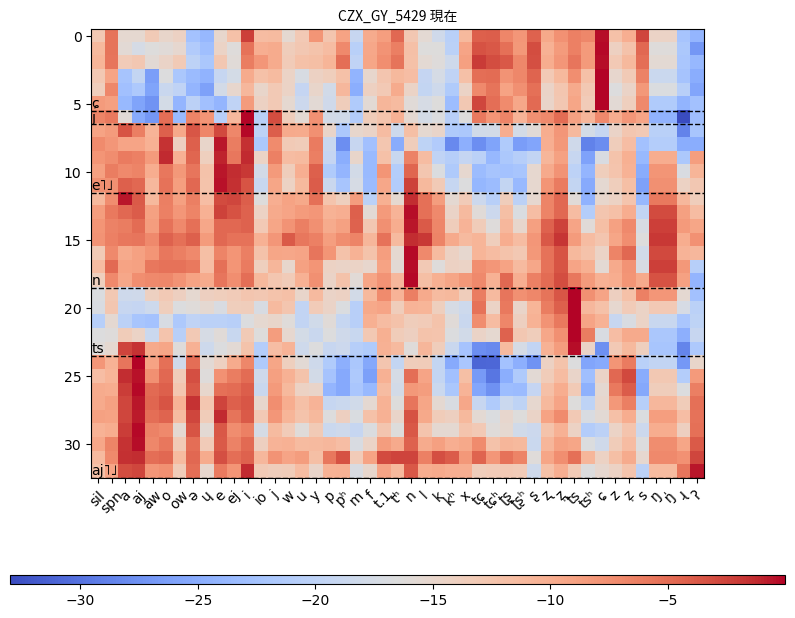

In [5]:
from typing import cast
import matplotlib.pyplot as plt

# utt_id = phones_df.utt_id.unique()[34]
# utt_id = "XSH_GY_0831"  # highly-reduced one
utt_id = "CZX_GY_5429"  # standard one
utt_df = phones_df.loc[phones_df["utt_id"] == utt_id, :]
pmat = utt_df.iloc[:, 4:].values

fig = plt.figure(figsize=(10, 10*(pmat.shape[0]/pmat.shape[1])+1))
plt.imshow(pmat, 
            cmap="coolwarm")

for phone, phone_grp in utt_df.groupby("phone", sort=False):
    t_end = phone_grp.iloc[-1].t
    phone = cast(str, phone)
    plt.text(-0.5, t_end+0.5, phone, va="bottom")
    plt.axhline(t_end+0.5, color="black", 
            linewidth=1, linestyle="dashed")

xticks = range(0, len(phone_table), 1)
xticklabels = [phone_table[y] for y in xticks]
plt.xticks(xticks, xticklabels, rotation=45) 
plt.colorbar(location="bottom", aspect=80)
plt.title(f"{utt_id} {WORD}", fontsize=20, font="Noto Sans CJK JP")
# fig.savefig(str(fig_dir/f"{utt_x.utt_id}_{word_x.label}.png"))


In [6]:
from pathlib import Path
wav_dir = Path(f"~/lago/mfa_data/xianzai/s1/").expanduser()
utt_id = "CZX_GY_5429"
from IPython.display import Audio
Audio(wav_dir/f"{utt_id}.wav", rate=22050)

## Visualize MFCC

In [7]:
feats_df.head()

,utt_id,t,phone,ml_phone,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,LJH_GY_1479,0,ɕ,io,2.737505,0.439690,-0.301160,0.462225,0.409859,-1.670285,...,-0.344656,0.375168,-0.165558,0.780448,-0.403100,0.215934,0.601305,-1.963853,-0.180188,-0.463715
1,LJH_GY_1479,1,ɕ,io,2.726633,0.633904,-0.962622,0.567133,0.190412,-1.364781,...,-0.785538,0.192515,-0.223887,-0.058991,-0.709453,0.060016,0.180704,-2.696306,0.351002,-1.729891
2,LJH_GY_1479,2,ɕ,io,2.672497,0.497954,2.770649,0.556051,0.413382,-1.192637,...,0.287747,-0.141942,-0.326891,-1.718525,-0.488239,-1.078218,0.119249,-0.480827,0.090209,-1.737799
3,LJH_GY_1479,3,ɕ,io,1.937237,0.350073,0.183219,0.581213,1.396186,-1.052626,...,0.370426,-1.391753,-0.195245,-2.346950,-0.602189,-1.707141,0.042958,1.667314,0.159313,0.224877
4,LJH_GY_1479,4,ɕ,t,1.608377,0.027522,0.540240,0.778250,1.465572,-0.427968,...,0.137225,-0.322270,-0.139066,-1.085535,-0.472409,-1.899876,1.740822,1.794776,0.572544,-0.440863


In [8]:
from sklearnex.manifold import TSNE
base_feat_idx = feats_df.columns.values.tolist().index("ml_phone")+1
feats_mat = feats_df.iloc[:,base_feat_idx:]
tsne = TSNE()
feats_proj = tsne.fit_transform(feats_mat)


/home/seantyh/miniconda3/envs/mfa/lib/python3.11/site-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Text(0, 0.5, 'tSNE-2')

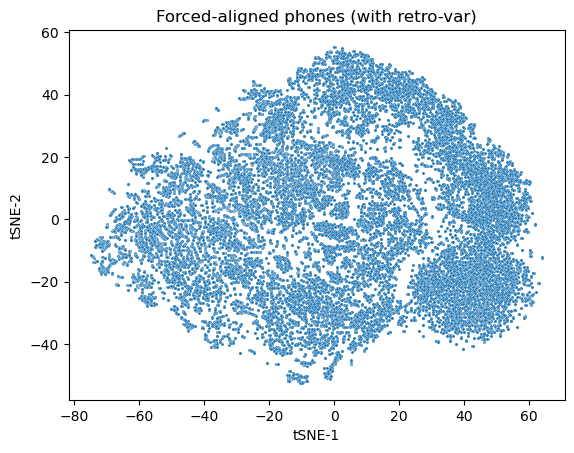

In [9]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0, 0.5, 'tSNE-2')

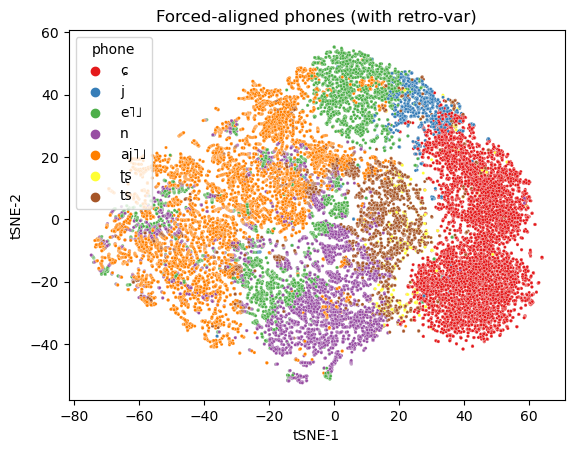

In [10]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], 
                hue=feats_df["phone"], palette="Set1",
                s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0.5, 0.9, 'max-logLik phones (with retro-var)')

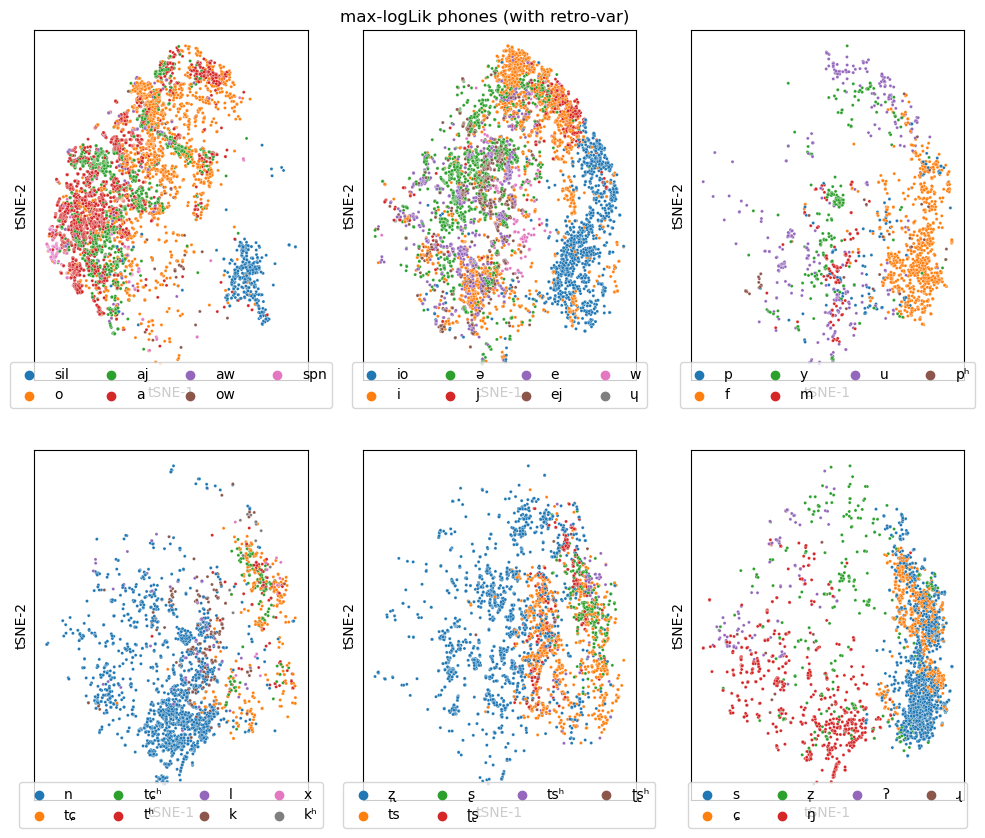

In [18]:
fig = plt.figure(figsize=(12, 10))
for ax_i in range(6):
    plt.subplot(2, 3, ax_i+1)
    sidx = ax_i*len(phone_table)//6
    eidx = (ax_i+1)*len(phone_table)//6
    subset_mask = feats_df["ml_phone"].isin(phone_table[sidx:eidx])
    sns.scatterplot(x=feats_proj[subset_mask,0], y=feats_proj[subset_mask,1], 
                    hue=feats_df["ml_phone"][subset_mask], palette="tab10",
                    s=5)
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")
    plt.yticks([])
    plt.xticks([])
    plt.gca().legend(loc="lower center", ncols=4, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("max-logLik phones (with retro-var)", y=.9)